IMPLEMENTING LOGISTIC REGRESSION USING BATCH GRADIENT DESCENT WITH REGULARISATION 

the whole intention with regularisation is to already have a overfit model, and then to generalise it to make
it just right fit, this is done by changing the cost function slightly to penalise huge values of the weights.
So to start with if the decision boundary seems to be non linear then we on purpose take higher order polymnomial feature terms to a certain degree and then we apply regularisation on it

importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

initial data handling


In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\coursera_ml\\data3.csv")
arr = df.to_numpy()
print(arr)

[[ 0.051267   0.69956    1.       ]
 [-0.092742   0.68494    1.       ]
 [-0.21371    0.69225    1.       ]
 [-0.375      0.50219    1.       ]
 [-0.51325    0.46564    1.       ]
 [-0.52477    0.2098     1.       ]
 [-0.39804    0.034357   1.       ]
 [-0.30588   -0.19225    1.       ]
 [ 0.016705  -0.40424    1.       ]
 [ 0.13191   -0.51389    1.       ]
 [ 0.38537   -0.56506    1.       ]
 [ 0.52938   -0.5212     1.       ]
 [ 0.63882   -0.24342    1.       ]
 [ 0.73675   -0.18494    1.       ]
 [ 0.54666    0.48757    1.       ]
 [ 0.322      0.5826     1.       ]
 [ 0.16647    0.53874    1.       ]
 [-0.046659   0.81652    1.       ]
 [-0.17339    0.69956    1.       ]
 [-0.47869    0.63377    1.       ]
 [-0.60541    0.59722    1.       ]
 [-0.62846    0.33406    1.       ]
 [-0.59389    0.005117   1.       ]
 [-0.42108   -0.27266    1.       ]
 [-0.11578   -0.39693    1.       ]
 [ 0.20104   -0.60161    1.       ]
 [ 0.46601   -0.53582    1.       ]
 [ 0.67339   -0.53582    1. 

In [44]:
m = arr.shape[0]   #numbe of data samples
n = arr.shape[1]-1  #number of features
print(m,n)

118 2


In [45]:
x_train = np.zeros([m, n])
y_train = np.zeros(m)

x_train += arr[:, :n]   #vectorised way of doing it, faster than for loops
y_train += arr[:, n]

print(x_train)
print(y_train)

[[ 0.051267   0.69956  ]
 [-0.092742   0.68494  ]
 [-0.21371    0.69225  ]
 [-0.375      0.50219  ]
 [-0.51325    0.46564  ]
 [-0.52477    0.2098   ]
 [-0.39804    0.034357 ]
 [-0.30588   -0.19225  ]
 [ 0.016705  -0.40424  ]
 [ 0.13191   -0.51389  ]
 [ 0.38537   -0.56506  ]
 [ 0.52938   -0.5212   ]
 [ 0.63882   -0.24342  ]
 [ 0.73675   -0.18494  ]
 [ 0.54666    0.48757  ]
 [ 0.322      0.5826   ]
 [ 0.16647    0.53874  ]
 [-0.046659   0.81652  ]
 [-0.17339    0.69956  ]
 [-0.47869    0.63377  ]
 [-0.60541    0.59722  ]
 [-0.62846    0.33406  ]
 [-0.59389    0.005117 ]
 [-0.42108   -0.27266  ]
 [-0.11578   -0.39693  ]
 [ 0.20104   -0.60161  ]
 [ 0.46601   -0.53582  ]
 [ 0.67339   -0.53582  ]
 [-0.13882    0.54605  ]
 [-0.29435    0.77997  ]
 [-0.26555    0.96272  ]
 [-0.16187    0.8019   ]
 [-0.17339    0.64839  ]
 [-0.28283    0.47295  ]
 [-0.36348    0.31213  ]
 [-0.30012    0.027047 ]
 [-0.23675   -0.21418  ]
 [-0.06394   -0.18494  ]
 [ 0.062788  -0.16301  ]
 [ 0.22984   -0.41155  ]


In [46]:
x0 = np.zeros(m)  #for first feature
x1 = np.zeros(m)   #for second feature

x0 += x_train[:, 0]
x1 += x_train[:, 1]

print(x0)
print(x1)

[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477
 -0.39804   -0.30588    0.016705   0.13191    0.38537    0.52938
  0.63882    0.73675    0.54666    0.322      0.16647   -0.046659
 -0.17339   -0.47869   -0.60541   -0.62846   -0.59389   -0.42108
 -0.11578    0.20104    0.46601    0.67339   -0.13882   -0.29435
 -0.26555   -0.16187   -0.17339   -0.28283   -0.36348   -0.30012
 -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408
  0.44297    0.322      0.13767   -0.0063364 -0.092742  -0.20795
 -0.20795   -0.43836   -0.21947   -0.13882    0.18376    0.22408
  0.29896    0.50634    0.61578    0.60426    0.76555    0.92684
  0.82316    0.96141    0.93836    0.86348    0.89804    0.85196
  0.82892    0.79435    0.59274    0.51786    0.46601    0.35081
  0.28744    0.085829   0.14919   -0.13306   -0.40956   -0.39228
 -0.74366   -0.69758   -0.75518   -0.69758   -0.4038    -0.38076
 -0.50749   -0.54781    

plotting the feature space

In [47]:
x_0 = []  #features with negative class output
x_1 = []  #features with pos class output

for i in range(m):
    if y_train[i] == 0:
        x_0.append(x_train[i])
    else:
        x_1.append(x_train[i])

x_0 = np.array(x_0)
x_1 = np.array(x_1)

print(x_0)

[[ 0.18376    0.93348  ]
 [ 0.22408    0.77997  ]
 [ 0.29896    0.61915  ]
 [ 0.50634    0.75804  ]
 [ 0.61578    0.7288   ]
 [ 0.60426    0.59722  ]
 [ 0.76555    0.50219  ]
 [ 0.92684    0.3633   ]
 [ 0.82316    0.27558  ]
 [ 0.96141    0.085526 ]
 [ 0.93836    0.012427 ]
 [ 0.86348   -0.082602 ]
 [ 0.89804   -0.20687  ]
 [ 0.85196   -0.36769  ]
 [ 0.82892   -0.5212   ]
 [ 0.79435   -0.55775  ]
 [ 0.59274   -0.7405   ]
 [ 0.51786   -0.5943   ]
 [ 0.46601   -0.41886  ]
 [ 0.35081   -0.57968  ]
 [ 0.28744   -0.76974  ]
 [ 0.085829  -0.75512  ]
 [ 0.14919   -0.57968  ]
 [-0.13306   -0.4481   ]
 [-0.40956   -0.41155  ]
 [-0.39228   -0.25804  ]
 [-0.74366   -0.25804  ]
 [-0.69758    0.041667 ]
 [-0.75518    0.2902   ]
 [-0.69758    0.68494  ]
 [-0.4038     0.70687  ]
 [-0.38076    0.91886  ]
 [-0.50749    0.90424  ]
 [-0.54781    0.70687  ]
 [ 0.10311    0.77997  ]
 [ 0.057028   0.91886  ]
 [-0.10426    0.99196  ]
 [-0.081221   1.1089   ]
 [ 0.28744    1.087    ]
 [ 0.39689    0.82383  ]


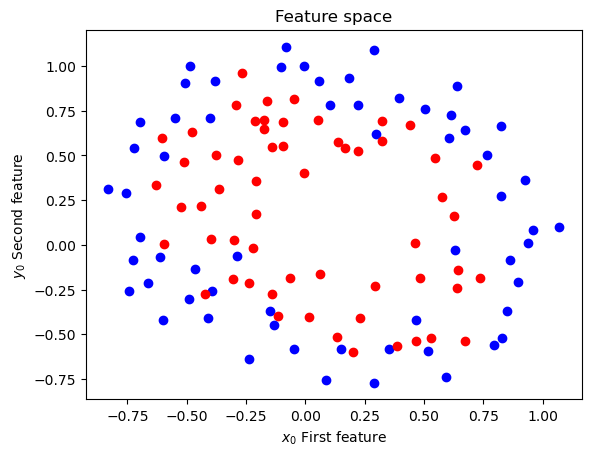

In [48]:
plt.scatter(x_0[:, 0], x_0[:, 1], c='b')
plt.scatter(x_1[:, 0], x_1[:, 1], c='r')
plt.xlabel("$x_0$ First feature")
plt.ylabel("$y_0$ Second feature")
plt.title("Feature space")
plt.show()

so we see that the decision boundary here would be non linear and hence we would benefit from having a overfit
non linear model initially that we generalise usinf regularisation

engineering new features with higher degrees, in this egs doing it till the 6th power

In [49]:
x_train_engg = np.c_[x0, x1, 
    x0**2, x1**2, x0*x1, 
    x0**3, x1**3, (x0**2)*x1, (x1**2)*x0,
    x0**4, x1**4, (x0**3)*x1, (x1**3)*x0, (x0**2)*(x1**2),
    x0**5, x1**5, (x0**4)*x1, (x1**4)*x0, (x0**3)*(x1**2), (x1**3)*(x1**2),
    x0**6, x1**6, (x0**5)*x1, (x1**5)*x0, (x0**4)*(x1**2), (x1**4)*(x0**2), (x0**3)*(x1**3)]


n = x_train_engg.shape[1]
print(n)
print(x_train_engg)
print(x_train_engg.shape)

#27 features now, these will be now used instead of the starting 2 features

27
[[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  3.38066048e-06
   6.29470940e-04  4.61305487e-05]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  3.47065055e-05
   1.89305413e-03 -2.56322636e-04]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  9.99597833e-04
   1.04882142e-02 -3.23789996e-03]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  5.49998544e-02
   2.34007252e-01 -1.13447630e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  1.60966700e-09
   4.00328554e-05 -2.53849495e-07]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ...  1.50119621e-04
   3.51474517e-07 -7.26382966e-06]]
(118, 27)


the main algorithm

In [50]:
#sigmoid func

def sigmoid(x, w, b):
    """
    returns the sigmoid value of a data sample

    Args:
        x (ndarray (n,)): a single data sample
        w (ndarray (n,)): weight array
        b (scalar): bias
    
    Returns:
        s (scalar): sigmoid value for 
    """
    
    s = 1/(1 + np.exp(-(np.dot(x, w) + b)))
    return s

In [51]:
#cost func

def calculate_cost(x, y, w, b, m, n, l):
    """
    returns the cost for the dataset

    Args:
        x (ndarray (m,n)): the feature dataset
        y (ndarray (m,)): the targets
        w (ndarray (n,)): weights array
        b (scalar): bias
        m (scalar): number of training samples
        n (scalar): number of features
        l (scalar): lambda or regularisation constant
    
    Returns:
        J (scalar): cost 
    """

    J = 0

    for i in range(m):
        J += (y[i]*np.log(sigmoid(x[i], w, b)) + (1- y[i])*np.log(1 - sigmoid(x[i], w, b)))
    J /= (-m)

    reg = 0

    for j in range(n):
        reg += (w[j]**2)
    reg *= (l/(2*m))
    
    J += reg

    return J


In [53]:

np.random.seed(1)
initial_w = np.random.rand(x_train_engg.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = calculate_cost(x_train_engg, y_train, initial_w, initial_b, m, n, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6959953682030402


In [58]:
# finding gradient 

def calculate_gradient(x, y, w, b, m, n, l):
    """
    calculates the gradient vector of cost wrt weight vector and also finds gradient of cost wrt bias

    Args:
        x (ndarray (m,n)): feature matrix
        y (ndarray (m,)): targets
        w (ndarray (n,)): weight vector
        b (scalar): bias
        m (scalar): number of data samples
        n (scalar): number of features
        l (scalar): regularisation constant

    Returns:
        d (ndarray (n,)): gradient vector
        dJ_db (scalar): gradient wrt bias   
    """

    d = []
    dJ_db = 0

    for i in range(n):
        d.append(
            sum([(sigmoid(x[j], w, b) - y[j])*x[j][i] for j in range(m)])/m + (l*w[i])/m
        )
    
    dJ_db += sum([sigmoid(x[k], w, b) - y[k] for k in range(m)])/m

    d = np.array(d)

    return d, dJ_db

In [59]:
#gradient descent or the main logistic regr algo

def logistic_regr(x, y, w, b, m, n, a, e, l):
    """
    returns epoch history list, cost history list, final weight vector and final bias vector
    
    Args:
        x (ndarray (m,n)): feature matrix
        y (ndarray (m,)): targets
        w (ndarray (n,)): weight array
        b (scalar): bias
        m (scalar): number of training samples
        n (scalar): number of features
        a (scalar): learning rate
        e (scalar): epcohs
        l (scalar): regularisation constant

    Returns:
        e_history (list): every 1000th epoch as elements
        cost_history (list): cost for every 1000th epoch as elements
        w (ndarray (n,)): final weight array
        b (scalar): final bias    
    """

    e_history = []
    cost_history = []

    for i in range(e):
        d, dJ_db = calculate_gradient(x, y, w, b, m, n, l)

        w -= a*d
        b -= a*dJ_db

        if (i+1)%1000 == 0 or i ==0:
            J = calculate_cost(x, y, w, b, m, n, l)
            e_history.append(i+1)
            cost_history.append(J)
            print(f"iteration: {i+1} cost: {J}")

    return e_history, cost_history, w, b

In [60]:
np.random.seed(1)
w_in = np.random.rand(x_train_engg.shape[1])-0.5
print(w_in)
b_in = 1
lambda_ = 0.01
epochs = 10000
a = 0.01

print(n)
print(m)

e_history, cost_history, w, b = logistic_regr(x_train_engg, y_train, w_in, b_in, m, n, a, epochs, lambda_)

[-0.082978    0.22032449 -0.49988563 -0.19766743 -0.35324411 -0.40766141
 -0.31373979 -0.15443927 -0.10323253  0.03881673 -0.08080549  0.1852195
 -0.29554775  0.37811744 -0.47261241  0.17046751 -0.0826952   0.05868983
 -0.35961306 -0.30189851  0.30074457  0.46826158 -0.18657582  0.19232262
  0.37638915  0.39460666 -0.41495579]
27
118
iteration: 1 cost: 0.7658780731554127
iteration: 1000 cost: 0.5974900282445936
iteration: 2000 cost: 0.5642426264476518
iteration: 3000 cost: 0.538545131678861
iteration: 4000 cost: 0.5179725565112809
iteration: 5000 cost: 0.5010944822415513
iteration: 6000 cost: 0.48697214256393945
iteration: 7000 cost: 0.47496510772499556
iteration: 8000 cost: 0.464621148151031
iteration: 9000 cost: 0.4556112647355462
iteration: 10000 cost: 0.44768991357291194


In [61]:
print(w)
print(b)

[ 0.90053996  1.59658625 -2.64411659 -1.63210499 -1.04407005 -0.07720368
 -0.4212622  -0.53862101 -0.42253464 -1.5239049  -1.37691772  0.18339644
 -0.47682733 -0.28877416 -0.60394532 -0.35026949 -0.31456895 -0.21770279
 -0.39380306 -0.81864933 -0.81877153 -0.62489001 -0.14143991  0.0950407
  0.05448202  0.03556932 -0.38066088]
1.4327517691230527


learning curve

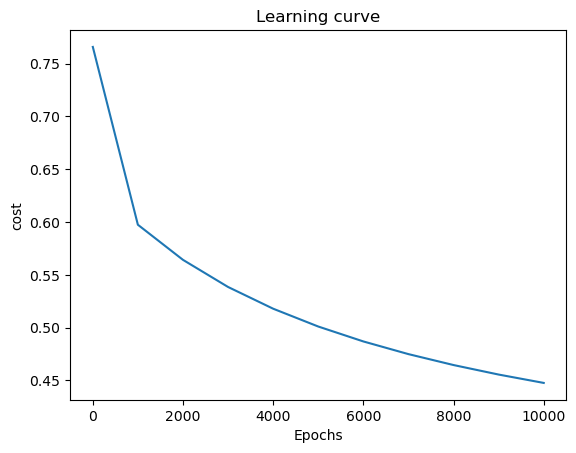

In [62]:
plt.plot(e_history, cost_history)
plt.xlabel("Epochs")
plt.ylabel("cost")
plt.title("Learning curve")
plt.show()

looking at the decision boundary

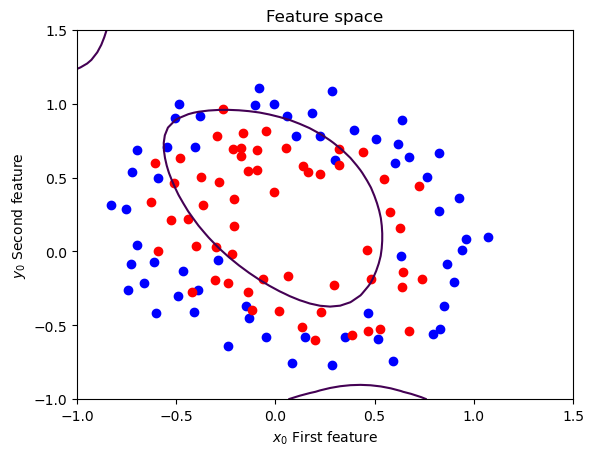

In [87]:
plt.scatter(x_0[:, 0], x_0[:, 1], c='b')
plt.scatter(x_1[:, 0], x_1[:, 1], c='r')
plt.xlabel("$x_0$ First feature")
plt.ylabel("$y_0$ Second feature")
plt.title("Feature space")

x = np.linspace(-1.0, 1.5, 50)
y = np.linspace(-1.0, 1.5, 50)
x0, x1 = np.meshgrid(x,y)
F = w[0]*x0 + w[1]*x1 + w[2]*(x0**2) +  w[3]*(x1**2) + w[4]*(x0*x1) + w[5]*(x0**3) + w[6]*(x1**3) + w[7]*(x0**2)*x1 + w[8]*(x1**2)*x0 +w[9]*(x0**4) + w[10]*(x1**4) + w[11]*(x0**3)*x1 + w[12]*(x1**3)*x0 + w[13]*(x0**2)*(x1**2) +w[14]*(x0**5) + w[15]*(x1**5) + w[16]*(x0**4)*x1 + w[17]*(x1**4)*x0 + w[18]*(x0**3)*(x1**2) + w[19]*(x1**3)*(x1**2) +w[20]*(x0**6) + w[21]*(x1**6) + w[22]*(x0**5)*x1 + w[23]*(x1**5)*x0 + w[24]*(x0**4)*(x1**2) + w[25]*(x1**4)*(x0**2) + w[26]*(x0**3)*(x1**3) + b
# F = np.zeros((len(x), len(y)))

# for i in range(len(x)):
#     for j in range(len(y)):

plt.contour(x0,x1,F,levels=[1])


plt.show()

In [ ]:
#not exactly right as its a contour plot and not a plot of the actual curve